# Pivoted full data

En este documento se crean las tablas para las predicciones.

In [1]:
import polars as pl

PATH = "data/cephalosporines_clean/"

## Report Drug

In [2]:
report_drug = pl.read_parquet(PATH + "report_drug.parquet")
# if it ends with _FR drop the column
fr_cols = [col for col in report_drug.columns if col.endswith("_FR")]
report_drug = report_drug.drop(fr_cols)
report_drug

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Intramuscular""","""50""","""Milligram""","""""","""""","""""","""""","""1""","""Days""","""SOLUTION INTRAMUSCULAR"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Oral""","""10""","""Milligram""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED"""
4419403,164,656,"""LASIX PARENTERAL INJ""","""Concomitant""","""Intravenous (not otherwise spe…","""40""","""Milligram""","""""","""""","""""","""""","""""","""""","""LIQUID INTRAMUSCULAR"""
4419406,164,1625,"""APRESOLINE INJECTION 20MG/AMPO…","""Concomitant""","""Intramuscular""","""20""","""Milligram""","""""","""""","""""","""""","""1""","""Days""","""POWDER FOR SOLUTION INTRAVENOU…"
4419404,164,24440,"""KEFLIN""","""Suspect""","""""","""1""","""Gram""","""4""","""1""","""Days""","""4 every 1 Days""","""""","""""","""POWDER FOR SOLUTION INTRAMUSCU…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949073,908149644,58275,"""CEPHALEXIN""","""Concomitant""","""Unknown""","""250""","""Milligram""","""1""","""""","""""","""""","""""","""""",""""""
4949077,908149644,31567,"""MYRBETRIQ""","""Concomitant""","""Unknown""","""50""","""Milligram""","""1""","""""","""""","""""","""""","""""","""TABLET (EXTENDED-RELEASE)"""
4949078,908149644,33553,"""ACETYLSALICYLIC ACID""","""Concomitant""","""Unknown""","""81""","""Milligram""","""1""","""""","""""","""""","""""","""""","""NOT SPECIFIED"""


In [3]:
report_drug.filter(pl.col("REPORT_ID") == 902245268)

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str
2450200,902245268,35591,"""BREO ELLIPTA""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""","""INHALATION"""
2450202,902245268,34020,"""SYMBICORT TURBUHALER""","""Suspect""","""Inhalation""","""2""","""Dosage forms""","""4""","""1""","""Days""","""4 every 1 Days""","""""","""""","""Powder"""
2450209,902245268,9945,"""TECTA""","""Concomitant""","""Unknown""","""40""","""Milligram""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""TABLET (ENTERIC-COATED)"""
2450198,902245268,7253,"""SPIRIVA""","""Suspect""","""Inhalation""","""1""","""Dosage forms""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""Capsules"""
2450205,902245268,59928,"""AMMONIA""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2450208,902245268,28502,"""SINUS RINSE""","""Concomitant""","""Unknown""","""""","""""","""2""","""1""","""Days""","""2 every 1 Days""","""""","""""","""SOLUTION NASAL"""
2450201,902245268,32451,"""SINGULAIR""","""Suspect""","""Unknown""","""10""","""Milligram""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""NOT SPECIFIED"""
2450199,902245268,33686,"""PULMICORT""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED"""


## Drug Product Ingredients

In [4]:
dpi = pl.read_parquet(PATH + "drug_product_ingredients.parquet")
dpi

DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,str,i64,str
29599010225,29599,"""BENZYDAMINE HYDROCHLORIDE/DICH…",10225,"""lidocaine hydrochloride"""
31212010225,31212,"""XYLOCAINE TOPICAL""",10225,"""lidocaine hydrochloride"""
54995010225,54995,"""BECLOMETHASONE DIPROPIONATE/LI…",10225,"""lidocaine hydrochloride"""
55044010225,55044,"""ALUMINUM HYDROXIDE/DIPHENHYDRA…",10225,"""lidocaine hydrochloride"""
58165010225,58165,"""LIDOCAINE HYDROCHLORIDE/NOREPI…",10225,"""lidocaine hydrochloride"""
…,…,…,…,…
3322005010254,33220,"""DIPHTHERIA TOXOID (+) PERTUSSI…",5010254,"""diphtheria toxoid (crm197)"""
3334505010254,33345,"""DTAP-IPV-HIB""",5010254,"""diphtheria toxoid (crm197)"""
3322705008968,33227,"""REACTINE UNSPECIFIED""",5008968,"""cetirizine hcl"""


In [5]:
# join reportdrug DRUG_PRODUCT_ID with dpi DRUG_PRODUCT_ID and attach ACTIVE_INGREDIENT_NAME
rd = report_drug.join(dpi, on="DRUG_PRODUCT_ID")
rd = rd.sort("REPORT_ID")
rd

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
4419403,164,656,"""LASIX PARENTERAL INJ""","""Concomitant""","""Intravenous (not otherwise spe…","""40""","""Milligram""","""""","""""","""""","""""","""""","""""","""LIQUID INTRAMUSCULAR""",656010091,"""LASIX PARENTERAL INJ""",10091,"""furosemide"""
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Intramuscular""","""50""","""Milligram""","""""","""""","""""","""""","""1""","""Days""","""SOLUTION INTRAMUSCULAR""",350308017,"""LARGACTIL 50""",8017,"""chlorpromazine"""
4419404,164,24440,"""KEFLIN""","""Suspect""","""""","""1""","""Gram""","""4""","""1""","""Days""","""4 every 1 Days""","""""","""""","""POWDER FOR SOLUTION INTRAMUSCU…",2444008471,"""KEFLIN""",8471,"""cephalothin"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Oral""","""10""","""Milligram""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",32842010260,"""LIBRIUM""",10260,"""chlordiazepoxide hydrochloride"""
4419403,164,656,"""LASIX PARENTERAL INJ""","""Concomitant""","""Intravenous (not otherwise spe…","""40""","""Milligram""","""""","""""","""""","""""","""""","""""","""LIQUID INTRAMUSCULAR""",656010092,"""LASIX PARENTERAL INJ""",10092,"""fursemide"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949078,908149644,33553,"""ACETYLSALICYLIC ACID""","""Concomitant""","""Unknown""","""81""","""Milligram""","""1""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",3355305009956,"""ACETYLSALICYLIC ACID""",5009956,"""acetylicsalicylic acid"""
4949077,908149644,31567,"""MYRBETRIQ""","""Concomitant""","""Unknown""","""50""","""Milligram""","""1""","""""","""""","""""","""""","""""","""TABLET (EXTENDED-RELEASE)""",3156705004576,"""MYRBETRIQ""",5004576,"""mirabegron"""
4949073,908149644,58275,"""CEPHALEXIN""","""Concomitant""","""Unknown""","""250""","""Milligram""","""1""","""""","""""","""""","""""","""""","""""",5827506001657,"""CEPHALEXIN""",6001657,"""cefalexin"""


In [7]:
ejemplo = rd.filter(pl.col("REPORT_ID") == 902245268)
ejemplo

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
2450202,902245268,34020,"""SYMBICORT TURBUHALER""","""Suspect""","""Inhalation""","""2""","""Dosage forms""","""4""","""1""","""Days""","""4 every 1 Days""","""""","""""","""Powder""",34020012633,"""SYMBICORT TURBUHALER""",12633,"""formoterol fumarate dihydrate"""
2450198,902245268,7253,"""SPIRIVA""","""Suspect""","""Inhalation""","""1""","""Dosage forms""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""Capsules""",7253013057,"""SPIRIVA""",13057,"""tiotropium"""
2450199,902245268,33686,"""PULMICORT""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""",3368607581,"""PULMICORT""",7581,"""budesonide"""
2450208,902245268,28502,"""SINUS RINSE""","""Concomitant""","""Unknown""","""""","""""","""2""","""1""","""Days""","""2 every 1 Days""","""""","""""","""SOLUTION NASAL""",28502055,"""SINUS RINSE""",55,"""sodium chloride"""
2450200,902245268,35591,"""BREO ELLIPTA""","""Suspect""","""Unknown""","""""","""""","""""","""""","""""","""""","""""","""""","""INHALATION""",35591022120,"""BREO ELLIPTA""",22120,"""vilanterol"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2450209,902245268,9945,"""TECTA""","""Concomitant""","""Unknown""","""40""","""Milligram""","""1""","""1""","""Days""","""1 every 1 Days""","""""","""""","""TABLET (ENTERIC-COATED)""",994505009613,"""TECTA""",5009613,"""pantoprazol"""
2450208,902245268,28502,"""SINUS RINSE""","""Concomitant""","""Unknown""","""""","""""","""2""","""1""","""Days""","""2 every 1 Days""","""""","""""","""SOLUTION NASAL""",2850209199,"""SINUS RINSE""",9199,"""sodium acid carbonate"""
2450208,902245268,28502,"""SINUS RINSE""","""Concomitant""","""Unknown""","""""","""""","""2""","""1""","""Days""","""2 every 1 Days""","""""","""""","""SOLUTION NASAL""",2850205010785,"""SINUS RINSE""",5010785,"""bicarbonate de sodium"""


In [8]:
# ejemplo where CEFZIL 
ejemplo.filter(pl.col("DRUGNAME") == "CEFZIL")

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQ_TIME_UNIT_ENG,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,DOSAGEFORM_ENG,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
2450206,902245268,27400,"""CEFZIL""","""Concomitant""","""Unknown""","""500""","""Milligram""","""2""","""1""","""Days""","""2 every 1 Days""","""""","""""","""NOT SPECIFIED""",274000188,"""CEFZIL""",188,"""cefprozil"""


In [9]:
rds = rd.select(["REPORT_ID", "ACTIVE_INGREDIENT_NAME"])
rds

# pivot table to have REPORT_ID as index and ACTIVE_INGREDIENT_NAME as columns
pivoted = rds.pivot(values="ACTIVE_INGREDIENT_NAME", index="REPORT_ID", columns="ACTIVE_INGREDIENT_NAME", aggregate_function="count")
pivoted = pivoted.fill_null(0)
pivoted

C:\Users\herie\AppData\Local\Temp\ipykernel_25480\1291287698.py:5: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  pivoted = rds.pivot(values="ACTIVE_INGREDIENT_NAME", index="REPORT_ID", columns="ACTIVE_INGREDIENT_NAME", aggregate_function="count")
C:\Users\herie\AppData\Local\Temp\ipykernel_25480\1291287698.py:5: DeprecationWarning: `aggregate_function='count'` input for `pivot` is deprecated. Please use `aggregate_function='len'`.
(Deprecated in version 0.20.5)
  pivoted = rds.pivot(values="ACTIVE_INGREDIENT_NAME", index="REPORT_ID", columns="ACTIVE_INGREDIENT_NAME", aggregate_function="count")


REPORT_ID,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,frusemide,cefalotin,hydralazine hcl,methaminodiazepoxide hcl,chlorpramazine,gentamicin sulfate,erythromycin,gentamycin sulfate,"gentamicin, sulfate",erythromycin gluceptate,erythromycin cyclocarbonate,erythromycin acistrate,erythromycin oxime,gentamicin sulphate,erythromycin salt not specified,erythromycin stinoprate,gentamicine (sulfate de),guaifenesin,dextropropoxyphene hydrochloride,cephalexin,propoxyphene hcl,acetylsalicylic acid,caffeine,methyltheobromine,methylol cefalexin lysinate,aspirin,asa,acetylsalicylsyre,acetylsalicyilic acid,guaranine,…,pemetrexed disodium hemipentahydrate,acetarsol,metoprolol fumarate,acetarsone,acetphenarsine,humanized igg4 anti-pd-1 monoclonal antibody,topiramat,ethynodiol diacetate,etynodiol,ethynodiol,etynodiol acetate,etynodiol diacetate,acetazolamide sodium,acetyldigoxin,sodium acetazolamide,beta-acetyldigoxin,diphenylpyraline hydrochloride,hydrocortisone butyrate,hydrocortisone 17-butyrate,hydrocortisone buteprate,metoprolol succinate,prunus cerasus,zea mays,mentha longifolia,prunus cerasus stem,prunus cerasus syrup,cerasus vulgaris stem,mentha longifolia extract,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
164,1,1,2,2,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173,0,0,2,0,0,0,0,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
346,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
908140706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
908142798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
908147666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# view the columns where this is not 0 for REPORT_ID 902245268
cols = pivoted.columns
example_pivoted = pivoted.filter(pl.col("REPORT_ID") == 902245268)
cols_with_value = [col for col in cols if example_pivoted[0, col] != 0]
example_pivoted.select(cols_with_value)

REPORT_ID,prednisone,prednison,sodium bicarbonate,vichy salt,sodium bicarbonate hemodialys,baking soda,sodium bicarbonate hemodialysis,bicarbonate de sodium,sodium salt of Carbonic Acid,sodium acid carbonate,sodium hydrogen carbonate,sod bicarb,sodium bicarb,salbutamol,sodium chloride,natrum muriaticum,sodium chloride hemodialys,sea salt,na cl,nacl,sodium chloride compound injection,common salt,sod chloride,sodium chloride hemodialysis,salt,rock salt,sodium chloride bacteriostatic,salbutamol sulfate,salbutamol sulphate aerosol,albuterol sulfate,salbutamol sulphate,budesonide,dihydrate budesonide,fe 999315,budesonide mmx,budesonid,cefprozil,pantoprazole,pantoprazol,mometasone furoate,formoterol fumarate dihydrate,formoterolfumarat dihydrat,tiotropium,montelukast sodium,fluticasone furoate,furoate de fluticasone,fiuticasone furoate,vilanterol,ammonia
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
902245268,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,2,2,2,1,1,1,1,1,1,1


In [32]:
# save pivoted to parquet
pivoted.write_parquet(PATH + "pivoted_active_ingredients.parquet")

### Cleaning reports

In [15]:
# plot the top 50
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import style
style.mpl_apply()

In [17]:
counts = rd['ACTIVE_INGREDIENT_NAME'].value_counts()
sorted_counts = counts.sort(by='count', descending=True)
sorted_counts

ACTIVE_INGREDIENT_NAME,count
str,u32
"""cefalexin""",10755
"""acetaminophen""",5139
"""acetaminophen (paracetamol)""",4870
"""paracetomol""",4870
"""apap""",4870
…,…
"""heparin porcine""",1
"""acetarsone""",1
"""crataegus""",1


Removed 0 items with count <= 0. Remaining items: 9088
Removed 1858 items with count <= 1. Remaining items: 7230
Removed 1010 items with count <= 2. Remaining items: 6220
Removed 508 items with count <= 3. Remaining items: 5712
Removed 356 items with count <= 4. Remaining items: 5356
Removed 258 items with count <= 5. Remaining items: 5098
Removed 217 items with count <= 6. Remaining items: 4881
Removed 154 items with count <= 7. Remaining items: 4727
Removed 157 items with count <= 8. Remaining items: 4570
Removed 221 items with count <= 9. Remaining items: 4349
Removed 207 items with count <= 10. Remaining items: 4142
Removed 163 items with count <= 11. Remaining items: 3979
Removed 113 items with count <= 12. Remaining items: 3866
Removed 135 items with count <= 13. Remaining items: 3731
Removed 79 items with count <= 14. Remaining items: 3652
Removed 111 items with count <= 15. Remaining items: 3541
Removed 76 items with count <= 16. Remaining items: 3465
Removed 49 items with coun

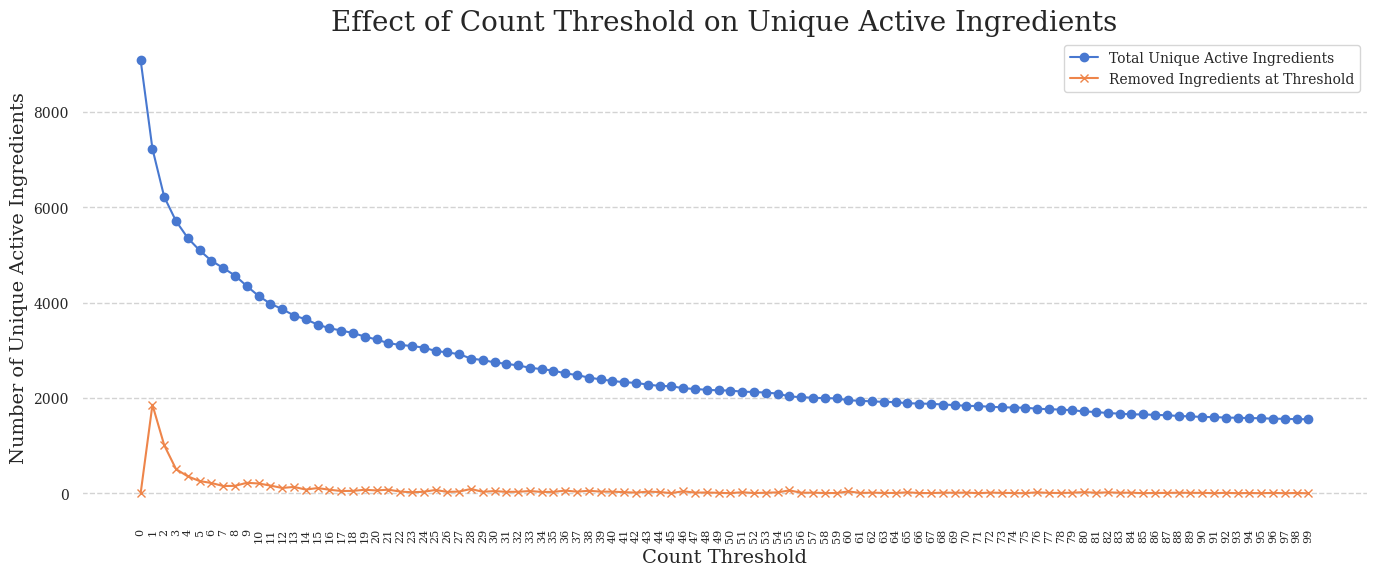

In [18]:
# sum sorted_counts['count']
total_length = [len(sorted_counts)]
difference = [ ]

r = 100
# keep if count is more than 1
for i in range (r):
    sorted_counts = sorted_counts.filter(pl.col('count') > i)
    current_length = len(sorted_counts)
    removed = total_length[-1] - current_length
    total_length.append(current_length)
    difference.append(removed)
    print(f"Removed {removed} items with count <= {i}. Remaining items: {current_length}")

plt.figure(figsize=(14, 6))
plt.plot(range(r), total_length[1:], marker='o')   
plt.plot(range(r), difference, marker='x')
plt.xlabel('Count Threshold')
plt.ylabel('Number of Unique Active Ingredients')
plt.title('Effect of Count Threshold on Unique Active Ingredients')
plt.legend(['Total Unique Active Ingredients', 'Removed Ingredients at Threshold'])
plt.grid(axis='x')
plt.xticks(range(r), rotation=90, fontsize=8)
plt.tight_layout()
plt.savefig("visualizations/canada2/unique_active_ingredients_vs_threshold.pdf", bbox_inches='tight')
plt.show()

In [12]:
top_50 = sorted_counts.tail(50)
top_50

ACTIVE_INGREDIENT_NAME,count
str,u32
"""nicotine transdermal""",107
"""phenobarbitone""",106
"""phenobarbital salt with quinid…",106
"""phenobarbital""",106
"""mupirocin (mupirocin calcium d…",106
…,…
"""dexamethasone 21-phosphate""",100
"""dexamethasone 21-(dihydrogen p…",100
"""mesna""",100


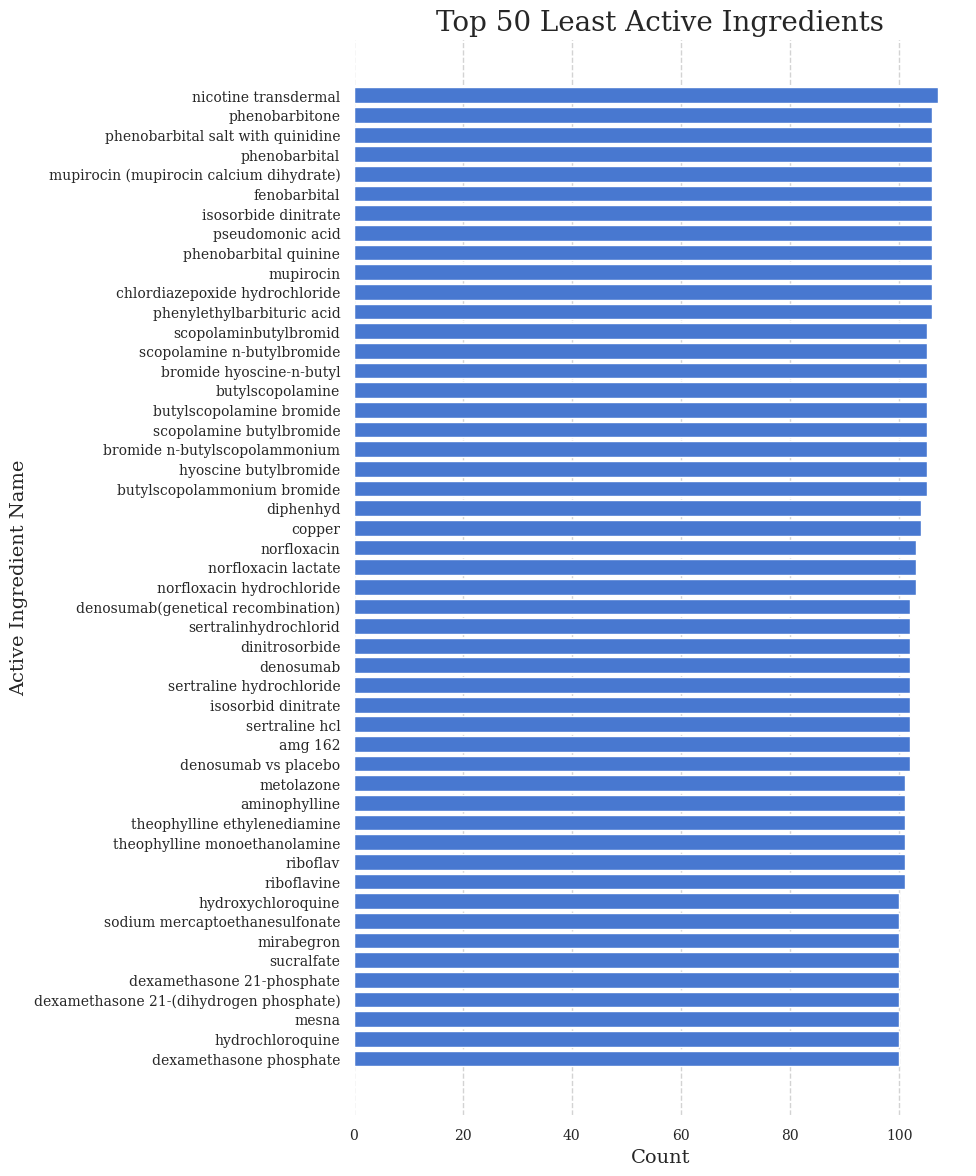

In [13]:
# plot the top 50
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import style
style.mpl_apply()

# Get the top 50
top_50 = sorted_counts.tail(50)

# Plot
plt.figure(figsize=(10, 12))
plt.barh(top_50['ACTIVE_INGREDIENT_NAME'], top_50['count'])
plt.xlabel('Count')
plt.ylabel('Active Ingredient Name')
plt.title('Top 50 Least Active Ingredients')
# hide x line grids
plt.grid(axis='y')
plt.gca().invert_yaxis()  # To have the highest at the top
plt.tight_layout()
plt.savefig("visualizations/canada2/top_50_least_active_ingredients.pdf")
plt.show()


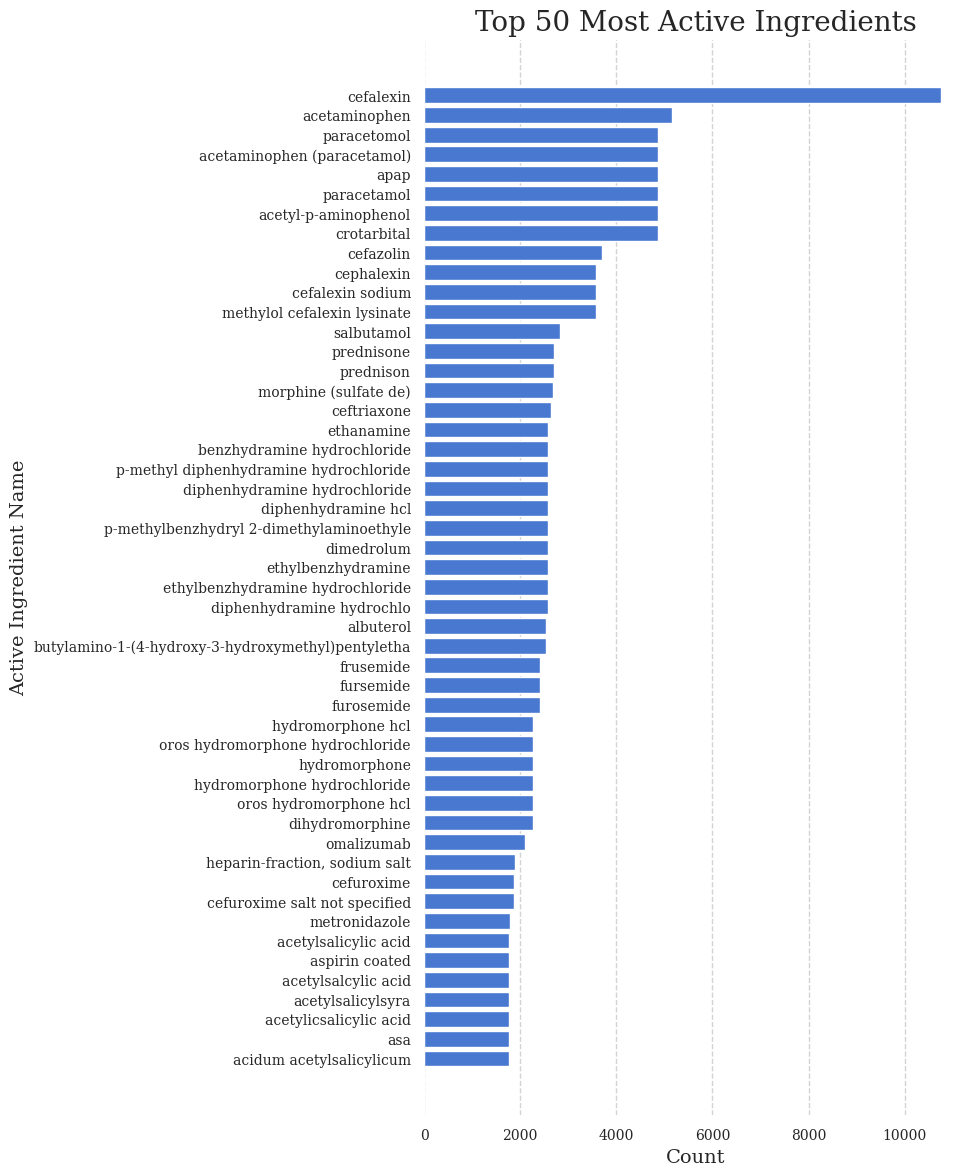

In [19]:
# plot the top 50
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import style
style.mpl_apply()

# Get the top 50
top_50 = sorted_counts.head(50)

# Plot
plt.figure(figsize=(10, 12))
plt.barh(top_50['ACTIVE_INGREDIENT_NAME'], top_50['count'])
plt.xlabel('Count')
plt.ylabel('Active Ingredient Name')
plt.title('Top 50 Most Active Ingredients')
# hide x line grids
plt.grid(axis='y')
plt.gca().invert_yaxis()  # To have the highest at the top
plt.tight_layout()
plt.savefig("visualizations/canada2/top_50_most_active_ingredients.pdf")
plt.show()


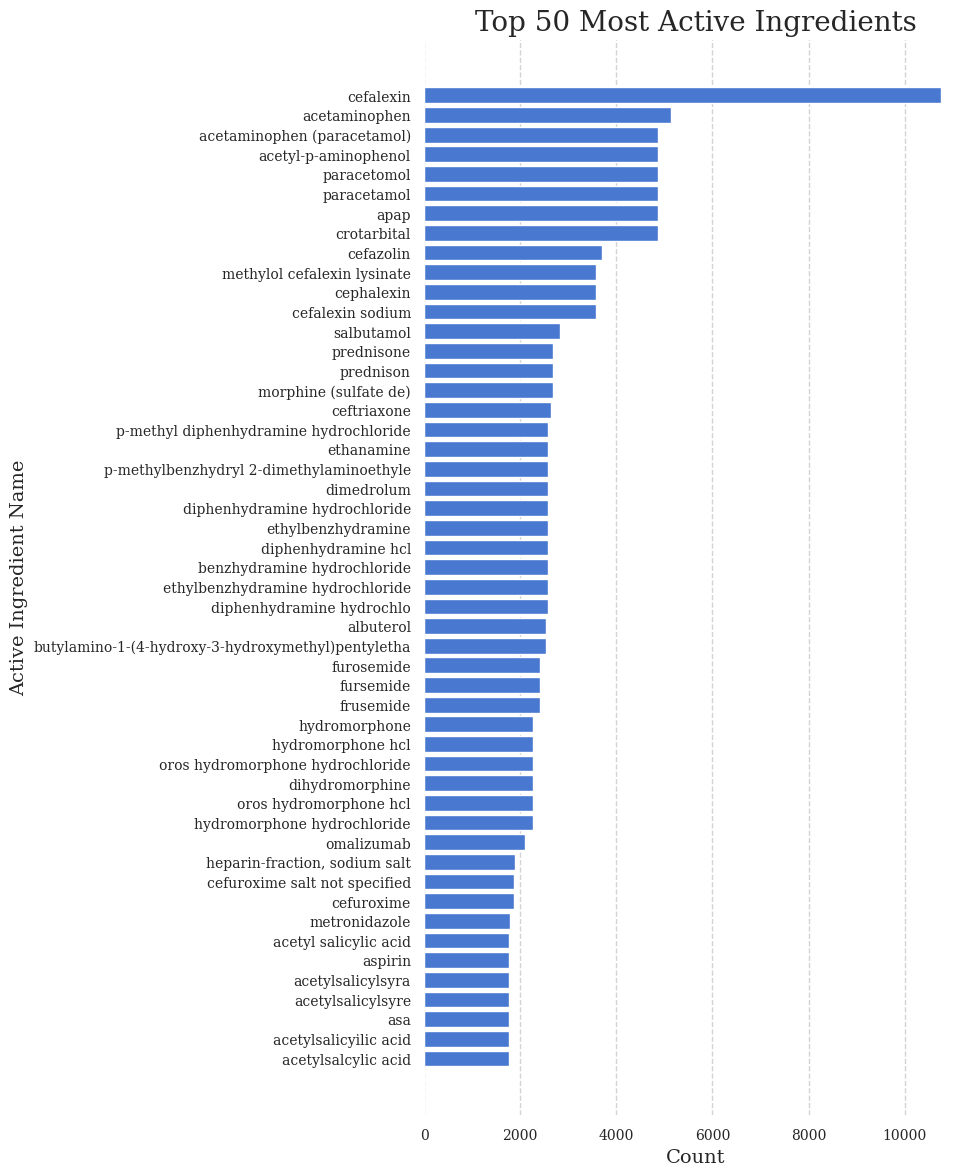

In [ ]:
# Get the top 50
top_50 = sorted_counts.head(50)

# Plot
plt.figure(figsize=(10, 12))
plt.barh(top_50['ACTIVE_INGREDIENT_NAME'], top_50['count'])
plt.xlabel('Count')
plt.ylabel('Active Ingredient Name')
plt.title('Top 50 Most Active Ingredients')
# hide x line grids
plt.grid(axis='y')
plt.gca().invert_yaxis()  # To have the highest at the top
plt.tight_layout()
plt.savefig("visualizations/canada2/top_50_most_active_ingredients.pdf")
plt.show()


## Reactions

In [26]:
reactions = pl.read_parquet(PATH + "reactions.parquet")
reactions

REACTION_ID,REPORT_ID,DURATION,DURATION_UNIT_ENG,DURATION_UNIT_FR,PT_NAME_ENG,PT_NAME_FR,SOC_NAME_ENG,SOC_NAME_FR,MEDDRA_VERSION
i64,i64,str,str,str,str,str,str,str,str
16401,164,"""""","""""","""""","""Periorbital oedema""","""Oedème périorbitaire""","""Eye disorders""","""Affections oculaires""","""v.28.0"""
17301,173,"""""","""""","""""","""Arthralgia""","""Arthralgie""","""Musculoskeletal and connective…","""Affections musculosquelettique…","""v.28.0"""
17302,173,"""""","""""","""""","""Arthralgia""","""Arthralgie""","""Musculoskeletal and connective…","""Affections musculosquelettique…","""v.28.0"""
18001,180,"""""","""""","""""","""Stomatitis""","""Stomatite""","""Gastrointestinal disorders""","""Affections gastro-intestinales""","""v.28.0"""
34601,346,"""""","""""","""""","""Rash erythematous""","""Rash érythémateux""","""Skin and subcutaneous tissue d…","""Affections de la peau et du ti…","""v.28.0"""
…,…,…,…,…,…,…,…,…,…
90814823404,908148234,"""""","""""","""""","""Abdominal pain upper""","""Douleur abdominale haute""","""Gastrointestinal disorders""","""Affections gastro-intestinales""","""v.28.0"""
90814964401,908149644,"""""","""""","""""","""Tremor""","""Tremblement""","""Nervous system disorders""","""Affections du système nerveux""","""v.28.0"""
90814964402,908149644,"""""","""""","""""","""Dyspnoea""","""Dyspnée""","""Respiratory, thoracic and medi…","""Affections respiratoires, thor…","""v.28.0"""


In [30]:
socs = reactions[['REPORT_ID', 'SOC_NAME_ENG']]
socs

REPORT_ID,SOC_NAME_ENG
i64,str
164,"""Eye disorders"""
173,"""Musculoskeletal and connective…"
173,"""Musculoskeletal and connective…"
180,"""Gastrointestinal disorders"""
346,"""Skin and subcutaneous tissue d…"
…,…
908148234,"""Gastrointestinal disorders"""
908149644,"""Nervous system disorders"""
908149644,"""Respiratory, thoracic and medi…"


In [64]:
socs_with_val = socs.with_columns(pl.lit(1).alias("value"))
pivot_socs = socs_with_val.pivot(values="value", index="REPORT_ID", columns="SOC_NAME_ENG", aggregate_function="max")
pivot_socs = pivot_socs.fill_null(0)
pivot_socs.write_parquet(PATH + "pivoted_socs.parquet")
pivot_socs

C:\Users\herie\AppData\Local\Temp\ipykernel_25480\828073222.py:2: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  pivot_socs = socs_with_val.pivot(values="value", index="REPORT_ID", columns="SOC_NAME_ENG", aggregate_function="max")


REPORT_ID,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Skin and subcutaneous tissue disorders,Renal and urinary disorders,General disorders and administration site conditions,Vascular disorders,Investigations,Nervous system disorders,Infections and infestations,Ear and labyrinth disorders,Psychiatric disorders,Blood and lymphatic system disorders,Immune system disorders,"Respiratory, thoracic and mediastinal disorders",Cardiac disorders,Hepatobiliary disorders,Metabolism and nutrition disorders,"Injury, poisoning and procedural complications",Reproductive system and breast disorders,Surgical and medical procedures,"Pregnancy, puerperium and perinatal conditions","Neoplasms benign, malignant and unspecified (incl cysts and polyps)","Congenital, familial and genetic disorders",Endocrine disorders,Social circumstances,Product issues,
i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
164,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
346,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
908140706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
908142798,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
908147666,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
for reaction in reactions['SOC_NAME_ENG'].unique().sort():
    print(reaction)


Blood and lymphatic system disorders
Cardiac disorders
Congenital, familial and genetic disorders
Ear and labyrinth disorders
Endocrine disorders
Eye disorders
Gastrointestinal disorders
General disorders and administration site conditions
Hepatobiliary disorders
Immune system disorders
Infections and infestations
Injury, poisoning and procedural complications
Investigations
Metabolism and nutrition disorders
Musculoskeletal and connective tissue disorders
Neoplasms benign, malignant and unspecified (incl cysts and polyps)
Nervous system disorders
Pregnancy, puerperium and perinatal conditions
Product issues
Psychiatric disorders
Renal and urinary disorders
Reproductive system and breast disorders
Respiratory, thoracic and mediastinal disorders
Skin and subcutaneous tissue disorders
Social circumstances
Surgical and medical procedures
Vascular disorders


## Reports Cleaned

In [55]:
reports = pl.read_parquet(PATH + "reports_short.parquet")
reports 

REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,datetime[ns],str,str,f64,f64
164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
173,1973-06-18 00:00:00,"""Male""","""42""",82.0,180.0
180,1973-06-18 00:00:00,"""Female""","""29""",null,null
346,1973-07-16 00:00:00,"""Female""","""""",null,null
356,1973-07-16 00:00:00,"""Female""","""21""",60.0,null
…,…,…,…,…,…
908140706,2025-06-25 00:00:00,"""Male""","""19""",null,null
908142798,2025-06-25 00:00:00,"""Male""","""59""",null,null
908147666,2025-06-27 00:00:00,"""Female""","""19""",null,null


In [56]:
# make AGE_Y float, if it is null, make it null float
reports = reports.with_columns(pl.col("AGE_Y").cast(pl.Float64, strict=False))
# code Male to 0 and Female to 1
reports = reports.with_columns(
    pl.when(pl.col("GENDER_ENG") == "Male").then(0).otherwise(1).alias("GENDER_CODE")
)
# drop DATRECEIVEDATE
reports = reports.drop(["DATRECEIVED"])
reports = reports.drop(["GENDER_ENG"])
reports

REPORT_ID,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE
i64,f64,f64,f64,i32
164,68.0,47.0,173.0,0
173,42.0,82.0,180.0,0
180,29.0,null,null,1
346,null,null,null,1
356,21.0,60.0,null,1
…,…,…,…,…
908140706,19.0,null,null,0
908142798,59.0,null,null,0
908147666,19.0,null,null,1


## Full Data

In [69]:
# join to pivoted the reports
full_data = None
full_data = reports.join(pivoted, on="REPORT_ID")
full_data = full_data.join(pivot_socs, on="REPORT_ID")
full_data.write_parquet(PATH + "pivoted_full_data.parquet")
full_data

REPORT_ID,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,frusemide,cefalotin,hydralazine hcl,methaminodiazepoxide hcl,chlorpramazine,gentamicin sulfate,erythromycin,gentamycin sulfate,"gentamicin, sulfate",erythromycin gluceptate,erythromycin cyclocarbonate,erythromycin acistrate,erythromycin oxime,gentamicin sulphate,erythromycin salt not specified,erythromycin stinoprate,gentamicine (sulfate de),guaifenesin,dextropropoxyphene hydrochloride,cephalexin,propoxyphene hcl,acetylsalicylic acid,caffeine,methyltheobromine,methylol cefalexin lysinate,aspirin,…,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Skin and subcutaneous tissue disorders,Renal and urinary disorders,General disorders and administration site conditions,Vascular disorders,Investigations,Nervous system disorders,Infections and infestations,Ear and labyrinth disorders,Psychiatric disorders,Blood and lymphatic system disorders,Immune system disorders,"Respiratory, thoracic and mediastinal disorders",Cardiac disorders,Hepatobiliary disorders,Metabolism and nutrition disorders,"Injury, poisoning and procedural complications",Reproductive system and breast disorders,Surgical and medical procedures,"Pregnancy, puerperium and perinatal conditions","Neoplasms benign, malignant and unspecified (incl cysts and polyps)","Congenital, familial and genetic disorders",Endocrine disorders,Social circumstances,Product issues,
i64,f64,f64,f64,i32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
164,68.0,47.0,173.0,0,1,1,2,2,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173,42.0,82.0,180.0,0,0,0,2,0,0,0,0,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,29.0,null,null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
346,null,null,null,1,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356,21.0,60.0,null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
908140706,19.0,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
908142798,59.0,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,…,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
908147666,19.0,null,null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
